### Methodology


*   ###### **Data Cleaning:** Checking for null values and based on their number either droping them or replacing with mean, median, mode based on the type and description of data. Droping decscrete and catagorical variables that have highly skewed histograms.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data. In case of catagorical variables it also helps in feature selection.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit..

*   ###### **Evalution:** In this case we are using F1 Score to determine the accuracy of the predicting model.



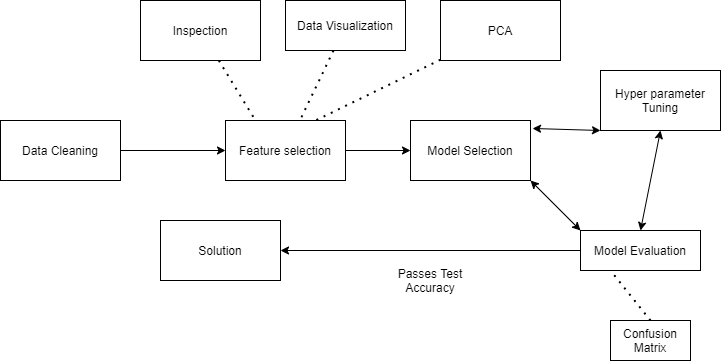

##### Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("drive/My Drive/Lab 8/train.csv",names=list(range(188)))
test = pd.read_csv("drive/My Drive/Lab 8/test.csv",names=list(range(188)))

##### checking for null values

In [ ]:
Null=[]
for i in train:
    Null.append((i,train[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

,class,per
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
183,183,0.0
184,184,0.0
185,185,0.0
186,186,0.0


Checking whether any class is having null values

In [ ]:
l=Null[Null['per']!=0]['class']
Null[Null['per']!=0]

,class,per


The data is clean

Cheching the distribution of class variable

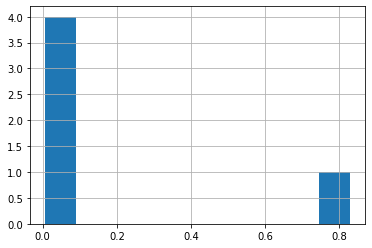

In [ ]:
(train[187].value_counts()/len(train.values)).hist()

its skewe towards only one class

##### Undersampling

In [ ]:
cols = [col for col in train.columns if col not in [187]]
X = train[cols]

In [ ]:
y=train[187]
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X, y = rus.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Converting into a df

In [ ]:
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,0.988889,0.704444,0.015556,0.000000,0.093333,0.102222,0.095556,0.086667,0.073333,0.082222,0.073333,0.080000,0.073333,0.080000,0.077778,0.088889,0.080000,0.088889,0.088889,0.095556,0.100000,0.108889,0.113333,0.135556,0.146667,0.173333,0.186667,0.222222,0.235556,0.260000,0.275556,0.297778,0.300000,0.317778,0.304444,0.297778,0.282222,0.255556,0.224444,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.844059,0.601485,0.037129,0.000000,0.004950,0.009901,0.014851,0.004950,0.022277,0.019802,0.034653,0.037129,0.047030,0.049505,0.051980,0.056931,0.066832,0.074257,0.096535,0.101485,0.108911,0.128713,0.146040,0.138614,0.163366,0.168317,0.180693,0.173267,0.183168,0.150990,0.148515,0.131188,0.108911,0.071782,0.074257,0.069307,0.051980,0.054455,0.059406,0.054455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.807396,0.215716,0.224961,0.229584,0.257319,0.263482,0.255778,0.260401,0.257319,0.268105,0.263482,0.246533,0.261941,0.269646,0.265023,0.272727,0.272727,0.289676,0.291217,0.292758,0.305085,0.329738,0.329738,0.332820,0.352851,0.382126,0.405239,0.436055,0.456086,0.477658,0.494607,0.513097,0.510015,0.508475,0.506934,0.477658,0.449923,0.429892,0.400616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.880531,0.477876,0.269911,0.212389,0.247788,0.230089,0.247788,0.256637,0.283186,0.269911,0.292035,0.314159,0.318584,0.323009,0.349558,0.340708,0.353982,0.371681,0.398230,0.376106,0.433628,0.429204,0.433628,0.446903,0.486726,0.455752,0.504425,0.508850,0.522124,0.504425,0.530973,0.500000,0.517699,0.455752,0.446903,0.411504,0.376106,0.340708,0.345133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.939314,0.688654,0.248021,0.113456,0.168865,0.121372,0.065963,0.044855,0.044855,0.036939,0.068602,0.050132,0.044855,0.042216,0.052770,0.055409,0.044855,0.044855,0.058047,0.060686,0.042216,0.050132,0.058047,0.063325,0.047493,0.052770,0.073879,0.092348,0.084433,0.097625,0.110818,0.124011,0.121372,0.134565,0.145119,0.145119,0.124011,0.131926,0.137203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0.619898,0.558673,0.530612,0.530612,0.517857,0.502551,0.451531,0.382653,0.260204,0.176020,0.079082,0.030612,0.015306,0.020408,0.053571,0.125000,0.219388,0.293367,0.357143,0.385204,0.420918,0.431122,0.428571,0.413265,0.426020,0.441327,0.451531,0.459184,0.466837,0.474490,0.477041,0.479592,0.484694,0.487245,0.494898,0.489796,0.507653,0.505102,0.512755,0.512755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3201,0.926829,0.470383,0.501742,0.501742,0.512195,0.505226,0.491289,0.435540,0.324042,0.181185,0.000000,0.006969,0.094077,0.111498,0.108014,0.128920,0.167247,0.125436,0.097561,0.094077,0.101045,0.097561,0.111498,0.114983,0.121951,0.108014

##### Checking the frequencies of values

Noting the columns with 80% of values with same value are contained in a list

In [ ]:
l=[]
for i in range(187):
  if ((df[i].value_counts()/len(df.values)).sort_values(ascending=False))[0] > 0.80:
    l.append(i)

displaying the columns with skewed data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


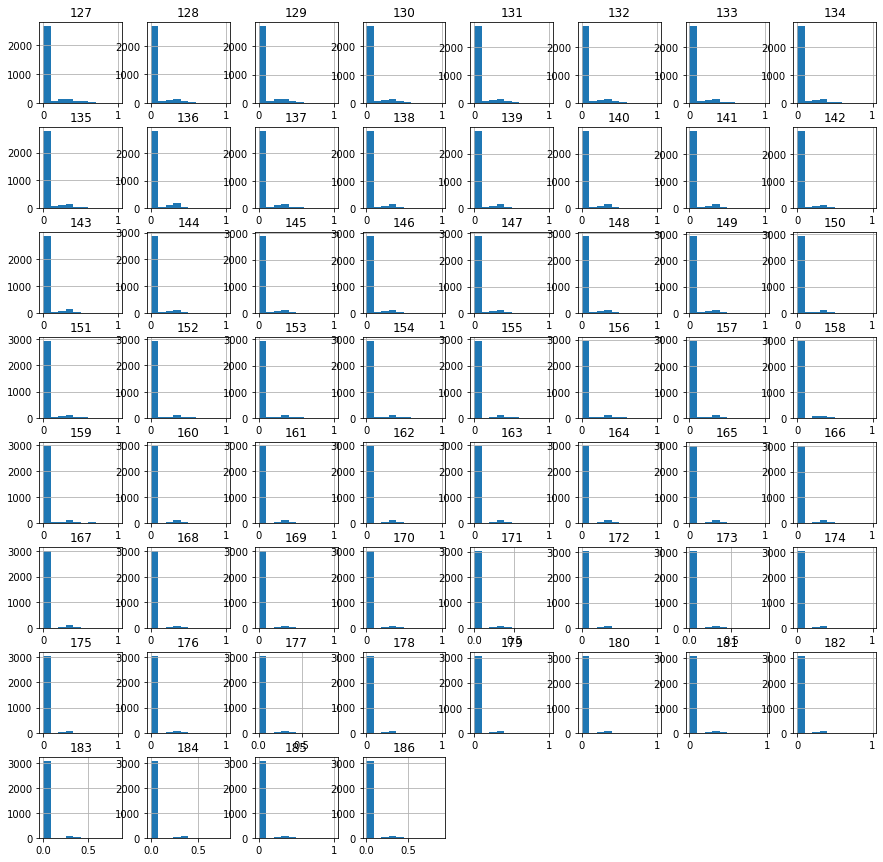

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df[l].hist(ax=ax)
plt.show()

Removing these labels will not affect the decision making

In [ ]:
df1=df.drop(l,axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
0,0.988889,0.704444,0.015556,0.000000,0.093333,0.102222,0.095556,0.086667,0.073333,0.082222,0.073333,0.080000,0.073333,0.080000,0.077778,0.088889,0.080000,0.088889,0.088889,0.095556,0.100000,0.108889,0.113333,0.135556,0.146667,0.173333,0.186667,0.222222,0.235556,0.260000,0.275556,0.297778,0.300000,0.317778,0.304444,0.297778,0.282222,0.255556,0.224444,0.200000,...,0.175556,0.173333,0.182222,0.151111,0.162222,0.157778,0.148889,0.135556,0.122222,0.108889,0.108889,0.106667,0.111111,0.113333,0.117778,0.111111,0.066667,0.095556,0.315556,0.755556,1.000000,0.526667,0.024444,0.026667,0.137778,0.108889,0.124444,0.104444,0.100000,0.104444,0.106667,0.102222,0.111111,0.104444,0.111111,0.108889,0.115556,0.113333,0.122222,0.122222
1,0.844059,0.601485,0.037129,0.000000,0.004950,0.009901,0.014851,0.004950,0.022277,0.019802,0.034653,0.037129,0.047030,0.049505,0.051980,0.056931,0.066832,0.074257,0.096535,0.101485,0.108911,0.128713,0.146040,0.138614,0.163366,0.168317,0.180693,0.173267,0.183168,0.150990,0.148515,0.131188,0.108911,0.071782,0.074257,0.069307,0.051980,0.054455,0.059406,0.054455,...,0.113861,0.108911,0.121287,0.123762,0.121287,0.123762,0.133663,0.128713,0.131188,0.146040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.807396,0.215716,0.224961,0.229584,0.257319,0.263482,0.255778,0.260401,0.257319,0.268105,0.263482,0.246533,0.261941,0.269646,0.265023,0.272727,0.272727,0.289676,0.291217,0.292758,0.305085,0.329738,0.329738,0.332820,0.352851,0.382126,0.405239,0.436055,0.456086,0.477658,0.494607,0.513097,0.510015,0.508475,0.506934,0.477658,0.449923,0.429892,0.400616,...,0.371341,0.368259,0.385208,0.416025,0.446841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.880531,0.477876,0.269911,0.212389,0.247788,0.230089,0.247788,0.256637,0.283186,0.269911,0.292035,0.314159,0.318584,0.323009,0.349558,0.340708,0.353982,0.371681,0.398230,0.376106,0.433628,0.429204,0.433628,0.446903,0.486726,0.455752,0.504425,0.508850,0.522124,0.504425,0.530973,0.500000,0.517699,0.455752,0.446903,0.411504,0.376106,0.340708,0.345133,...,0.123894,0.132743,0.141593,0.110619,0.163717,0.159292,0.190265,0.168142,0.190265,0.159292,0.163717,0.132743,0.000000,0.004425,0.199115,0.323009,0.429204,0.858407,0.929204,0.584071,0.292035,0.172566,0.199115,0.159292,0.181416,0.185841,0.190265,0.172566,0.212389,0.207965,0.221239,0.207965,0.234513,0.234513,0.247788,0.225664,0.247788,0.252212,0.283186,0.252212
4,1.000000,0.939314,0.688654,0.248021,0.113456,0.168865,0.121372,0.065963,0.044855,0.044855,0.036939,0.068602,0.050132,0.044855,0.042216,0.052770,0.055409,0.044855,0.044855,0.058047,0.060686,0.042216,0.050132,0.058047,0.063325,0.047493,0.052770,0.073879,0.092348,0.084433,0.097625,0.110818,0.124011,0.121372,0.134565,0.145119,0.145119,0.124011,0.131926,0.137203,...,0.649077,0.899736,0.997361,0.934037,0.733509,0.279683,0.116095,0.184697,0.153034,0.084433,0.055409,0.047493,0.068602,0.079156,0.058047,0.068602,0.076517,0.073879,0.060686,0.063325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

##### storing data with and without these columns help us understand which data is giving better accuracy or contains valuable information. As the domain data is not present

Normalizing train data

In [ ]:
col = list(df)
col1 = list(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col] = scaler.fit_transform(df[col])
df1[col1]= scaler.fit_transform(df1[col1])

In [ ]:
y1 = pd.DataFrame(data=y)
y1

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3200,4.0
3201,4.0
3202,4.0
3203,4.0


##### Checking the distribution of the label variable after RandomUnderSampling 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cde79ab00>]],
      dtype=object)

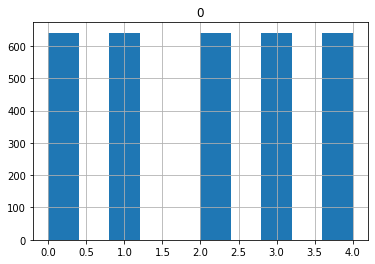

In [ ]:
y1.hist()

In [ ]:
X_test = test[col]
y_test = test[187]
X_test1 = test[col1]
y_test1 = test[187]
X_test[col] = scaler.fit_transform(X_test[col])
X_test1[col1]= scaler.fit_transform(X_test1[col1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

#### Models

clf, clf1 fits complete data and fits only data with selected columns respectively.

##### KNN on both the data sets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(weights="distance",)
knn1 =  KNeighborsClassifier()
knn.fit(df, y1)
knn1.fit(df1, y1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import f1_score
tr_error=f1_score(y1,knn.predict(df),average='weighted')
te_error=f1_score(y_test,knn.predict(X_test),average='weighted')
tr_error1=f1_score(y1,knn1.predict(df1),average='weighted')
te_error1=f1_score(y_test1,knn1.predict(X_test1),average='weighted')
error = {}
error["data"] = ["full","selected"]
error["train_F1_score"]=[tr_error,tr_error1]
error["test_F1_score"]=[te_error,te_error1]
error=pd.DataFrame(error)
error

,data,train_F1_score,test_F1_score
0,full,1.000000,0.818056
1,selected,0.901986,0.828445


The selected data had a little higher accuracy on test data. There is overfit in the first model as the difference in acuuracy is over 19%.

##### SVM

In [ ]:
from sklearn import svm
svc = svm.LinearSVC()
svc1 = svm.LinearSVC()
svc.fit(df, y1)
svc1.fit(df1, y1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
tr_error=f1_score(y1,svc.predict(df),average='weighted')
te_error=f1_score(y_test,svc.predict(X_test),average='weighted')
tr_error1=f1_score(y1,svc1.predict(df1),average='weighted')
te_error1=f1_score(y_test1,svc1.predict(X_test1),average='weighted')
error = {}
error["data"] = ["full","selected"]
error["train_F1_score"]=[tr_error,tr_error1]
error["test_F1_score"]=[te_error,te_error1]
error=pd.DataFrame(error)
error

,data,train_F1_score,test_F1_score
0,full,0.801014,0.694573
1,selected,0.786734,0.689804


Simmilar results as KNN. The model which used full data had higher score that selected but there is no over fit in the in selceted one.

This shows that the plane seperating the features is not doing qa better job. so we need to move to non-linear models

##### Decision tree

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt1 = tree.DecisionTreeClassifier()
dt.fit(df, y1)
dt1.fit(df1, y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tr_error=f1_score(y1,dt.predict(df),average='weighted')
te_error=f1_score(y_test,dt.predict(X_test),average='weighted')
tr_error1=f1_score(y1,dt1.predict(df1),average='weighted')
te_error1=f1_score(y_test1,dt1.predict(X_test1),average='weighted')
error = {}
error["data"] = ["full","selected"]
error["train_F1_score"]=[tr_error,tr_error1]
error["test_F1_score"]=[te_error,te_error1]
error=pd.DataFrame(error)
error

,data,train_F1_score,test_F1_score
0,full,1.0,0.773745
1,selected,1.0,0.776096


there is overfit in both the cases. Lets try random forest so that there may be a better result

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf1 = RandomForestClassifier()
rf.fit(df, y1)
rf1.fit(df1, y1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
tr_error=f1_score(y1,rf.predict(df),average='weighted')
te_error=f1_score(y_test,rf.predict(X_test),average='weighted')
tr_error1=f1_score(y1,rf1.predict(df1),average='weighted')
te_error1=f1_score(y_test1,rf1.predict(X_test1),average='weighted')
error = {}
error["data"] = ["full","selected"]
error["train_F1_score"]=[tr_error,tr_error1]
error["test_F1_score"]=[te_error,te_error1]
error=pd.DataFrame(error)
error

,data,train_F1_score,test_F1_score
0,full,1.0,0.889222
1,selected,1.0,0.887856


The accuracies are same for both the 

of all the models Random forest gives better results. This could due to the non-linearity nature helps understand this complex data. And as a combination of multiple trees helps to capture the patterns in multiple ways.

In [ ]:
import numpy as np
p=rf.predict(X_test)
pred=[]
act=[]
for i in range(len(X_test)):
    act.append(y_test[i])
    pred.append(p[i])

Text(114.0, 0.5, 'true label')

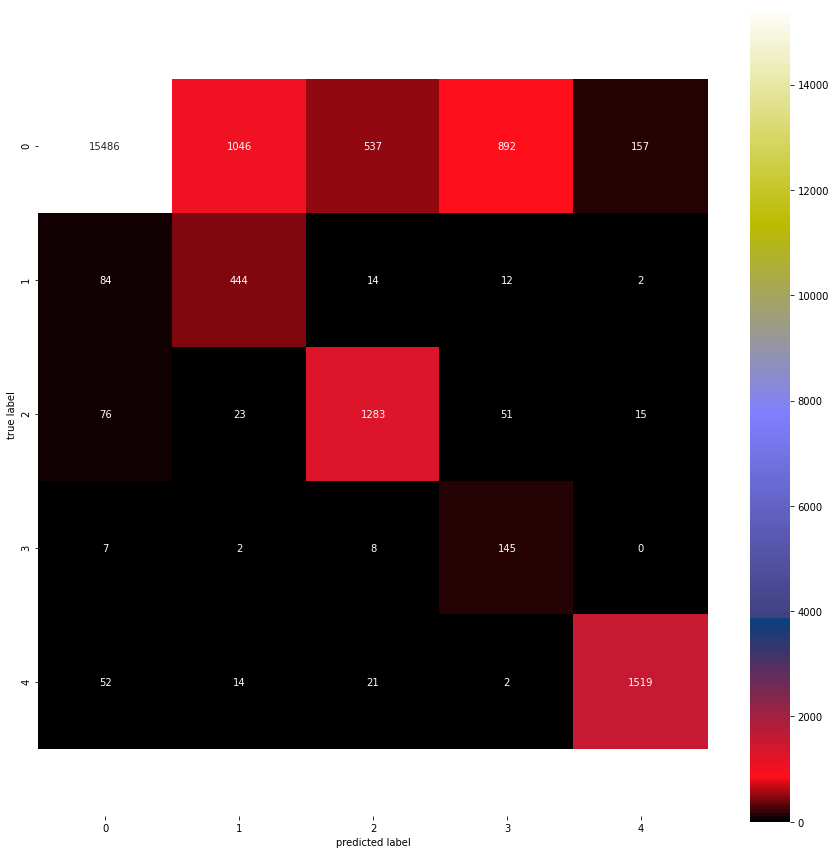

In [ ]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(act, pred, labels=list(range(5)))
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
ax=sns.heatmap(confm,annot=True,fmt='d',cbar=True,square=True,cmap="gist_stern")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("predicted label")
plt.ylabel("true label")

In [ ]:
import numpy as np
p=rf1.predict(X_test1)
pred=[]
act=[]
for i in range(len(X_test)):
    act.append(y_test[i])
    pred.append(p[i])

Text(114.0, 0.5, 'true label')

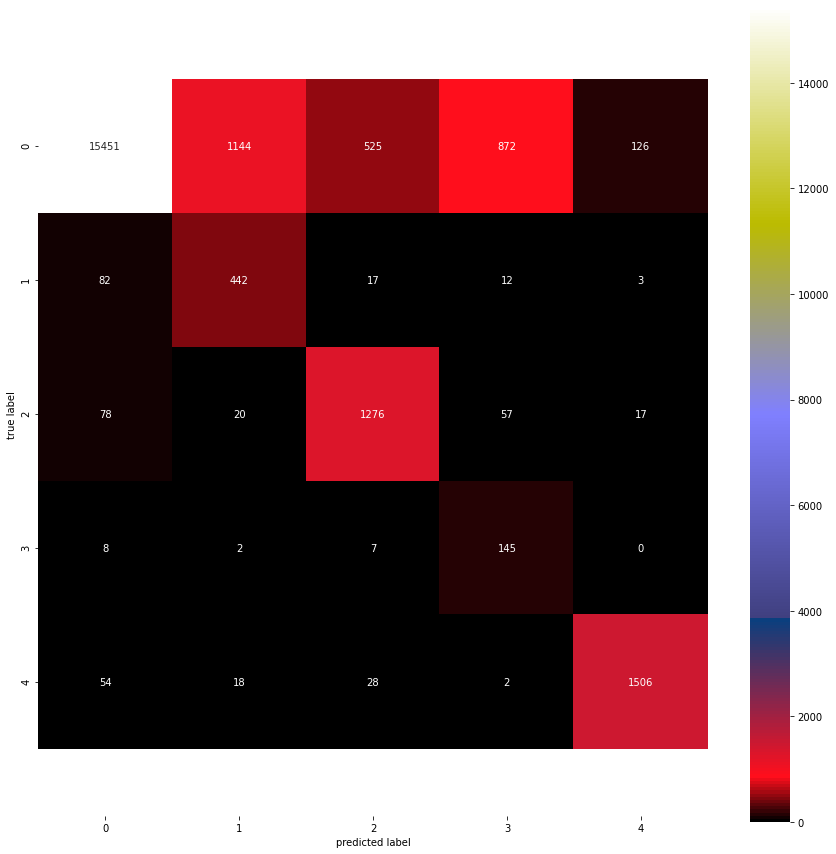

In [ ]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(act, pred, labels=list(range(5)))
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
ax=sns.heatmap(confm,annot=True,fmt='d',cbar=True,square=True,cmap="gist_stern")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("predicted label")
plt.ylabel("true label")

In both confusion matrices the there are so many false positives in the class disease. The boundary for disease and not is mot clear. there is a chance of improvement in this area.